# San Francisco Crime Data

In [456]:
import pandas as pd
import matplotlib as plt
import numpy as np
import time
from collections import Counter 
import matplotlib.pyplot as plot
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%matplotlib inline
df = pd.read_csv('datasets/san-francisco-crime-classification/train.csv')
df.tail()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
878044,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607
878048,2003-01-06 00:01:00,FORGERY/COUNTERFEITING,"CHECKS, FORGERY (FELONY)",Monday,BAYVIEW,NONE,1800 Block of NEWCOMB AV,-122.394926,37.738212


In [457]:
def hist_vis(df, title):
    ctrdict = dict(Counter(df))
    labels, values = ctrdict.keys(), ctrdict.values()
    fig, ax = plot.subplots(figsize=(11, 9))
#     ax.bar(list(values), labels, color='r')
    plot.title(title, weight='bold')
    plot.barh(range(len(labels)),list(values), color='g')
    plot.yticks(range(len(labels)), labels)
    plot.plot()
    

df.loc[df['Resolution'] == 'PROSECUTED BY OUTSIDE AGENCY', ['Resolution']] = 'PROSECUTED'
df.loc[df['Resolution'] == 'PROSECUTED FOR LESSER OFFENSE', ['Resolution']] = 'PROSECUTED'
df.loc[df['Resolution'] == 'DISTRICT ATTORNEY REFUSES TO PROSECUTE', ['Resolution']] = 'NOT PROSECUTED'
df.loc[df['Resolution'] == 'COMPLAINANT REFUSES TO PROSECUTE', ['Resolution']] = 'NOT PROSECUTED'
df.loc[df['Resolution'] == 'ARREST, BOOKED', ['Resolution']] = 'BOOKED'
df.loc[df['Resolution'] == 'JUVENILE BOOKED', ['Resolution']] = 'BOOKED'
df.loc[df['Resolution'] == 'ARREST, CITED', ['Resolution']] = 'CITED'
df.loc[df['Resolution'] == 'JUVENILE CITED', ['Resolution']] = 'CITED'
df.loc[df['Resolution'] == 'EXCEPTIONAL CLEARANCE', ['Resolution']] = 'CLEARED'
df.loc[df['Resolution'] == 'CLEARED-CONTACT JUVENILE FOR MORE INFO', ['Resolution']] = 'CLEARED'




hist = df["Resolution"]
display(len(Counter(df["Resolution"])))


11

In [458]:
df.Category.unique()

array(['WARRANTS', 'OTHER OFFENSES', 'LARCENY/THEFT', 'VEHICLE THEFT',
       'VANDALISM', 'NON-CRIMINAL', 'ROBBERY', 'ASSAULT', 'WEAPON LAWS',
       'BURGLARY', 'SUSPICIOUS OCC', 'DRUNKENNESS',
       'FORGERY/COUNTERFEITING', 'DRUG/NARCOTIC', 'STOLEN PROPERTY',
       'SECONDARY CODES', 'TRESPASS', 'MISSING PERSON', 'FRAUD',
       'KIDNAPPING', 'RUNAWAY', 'DRIVING UNDER THE INFLUENCE',
       'SEX OFFENSES FORCIBLE', 'PROSTITUTION', 'DISORDERLY CONDUCT',
       'ARSON', 'FAMILY OFFENSES', 'LIQUOR LAWS', 'BRIBERY',
       'EMBEZZLEMENT', 'SUICIDE', 'LOITERING', 'SEX OFFENSES NON FORCIBLE',
       'EXTORTION', 'GAMBLING', 'BAD CHECKS', 'TREA', 'RECOVERED VEHICLE',
       'PORNOGRAPHY/OBSCENE MAT'], dtype=object)

In [459]:
len(df.Category.unique())

39

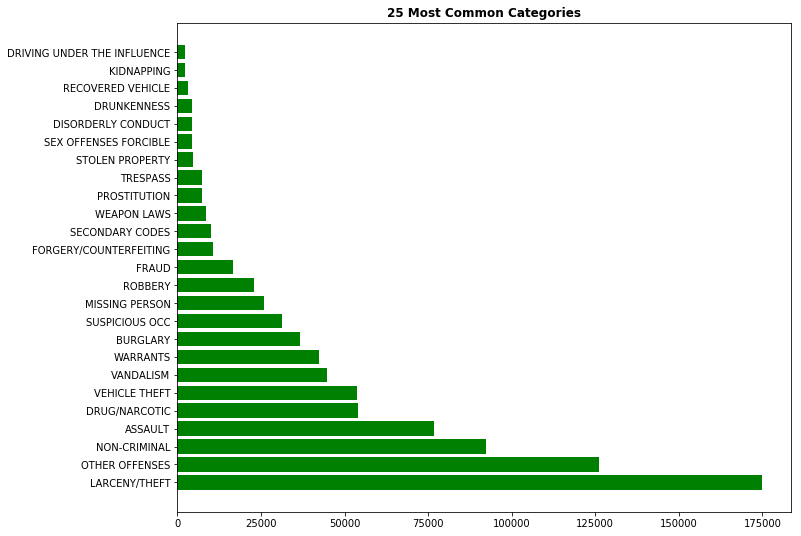

In [460]:
hist = Counter(df['Category'])
hist_vis(dict(hist.most_common(25)), "25 Most Common Categories")

In [461]:
df["PdDistrict"].unique()

array(['NORTHERN', 'PARK', 'INGLESIDE', 'BAYVIEW', 'RICHMOND', 'CENTRAL',
       'TARAVAL', 'TENDERLOIN', 'MISSION', 'SOUTHERN'], dtype=object)

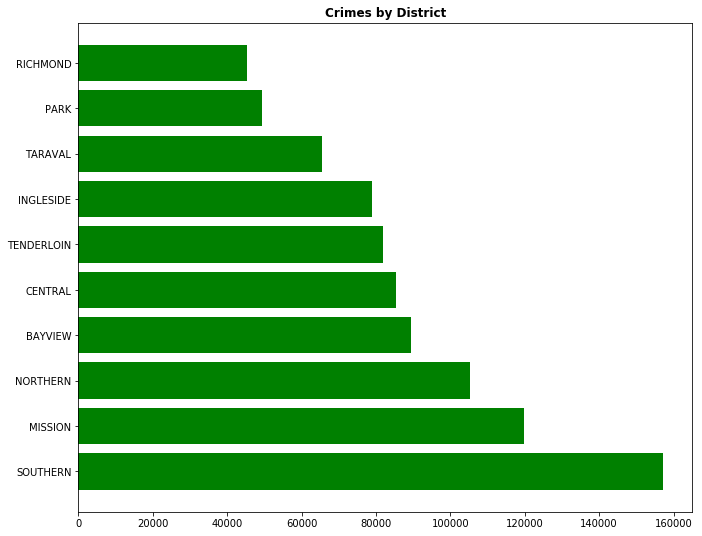

In [462]:
distdicthist = Counter(df["PdDistrict"])
hist_vis(dict(distdicthist.most_common()), "Crimes by District")


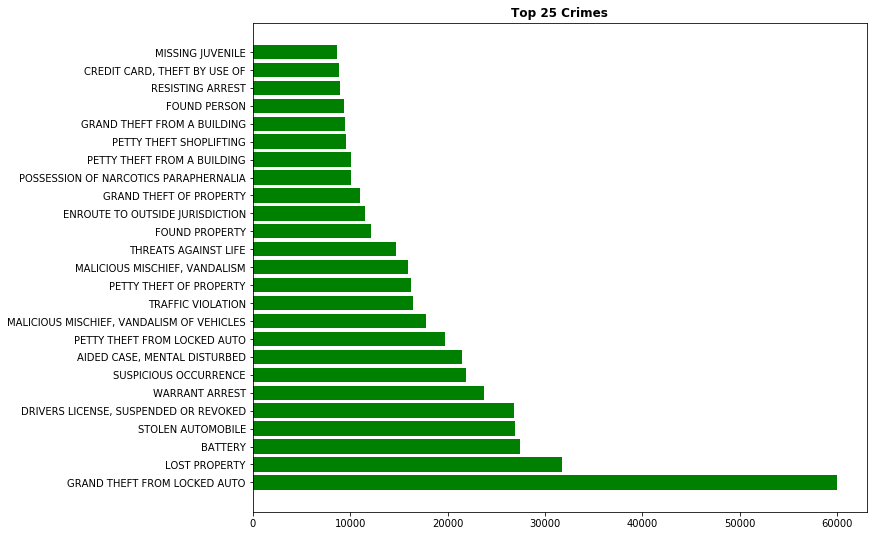

In [463]:
descdicthist = Counter(df["Descript"])
hist_vis(dict(descdicthist.most_common(25)), "Top 25 Crimes")

In [464]:
def visualize_desc(desc):
    retdf = df[df["Descript"] == desc]
    if len(retdf) < 1:
        print ("No incidents found for " + desc)
        return 0
    else:
        print(len(retdf))
        print(desc)
        
        hist_vis(retdf["Resolution"], "Resolutions")
        hist_vis(retdf["DayOfWeek"], "Day of the Week")
        

60022
GRAND THEFT FROM LOCKED AUTO


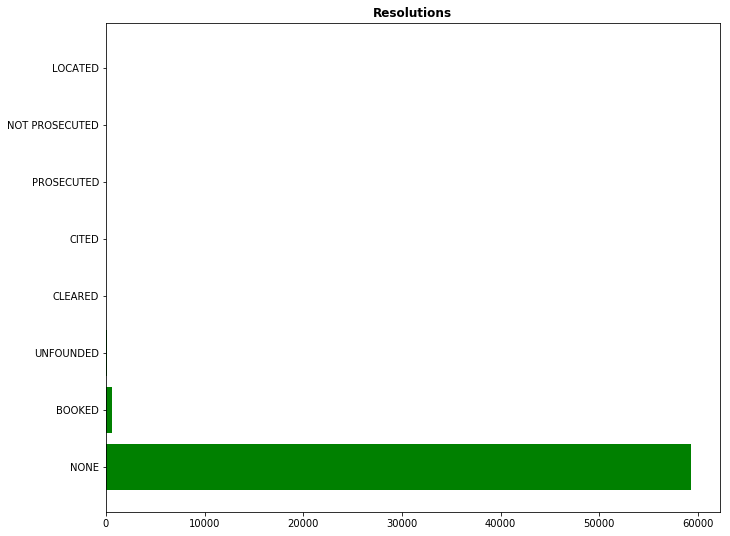

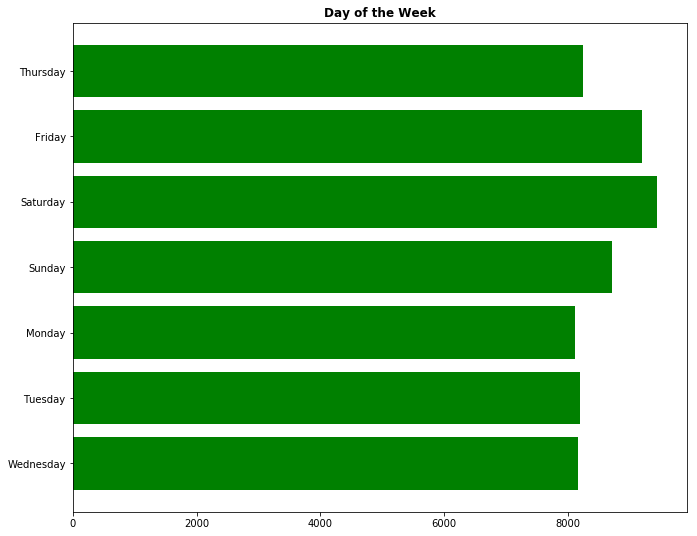

In [465]:
# querydf = df[df["Descript"] == "PLACING WIFE IN HOUSE OF PROSTITUTION"]
visualize_desc("GRAND THEFT FROM LOCKED AUTO")


26897
STOLEN AUTOMOBILE


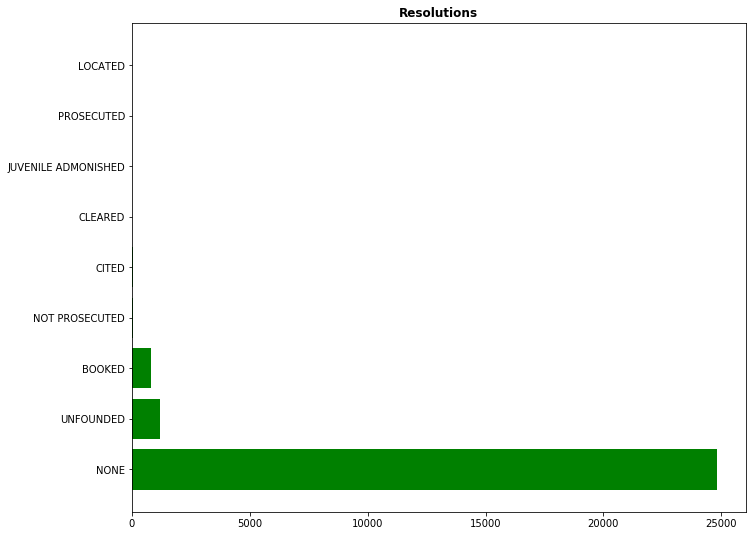

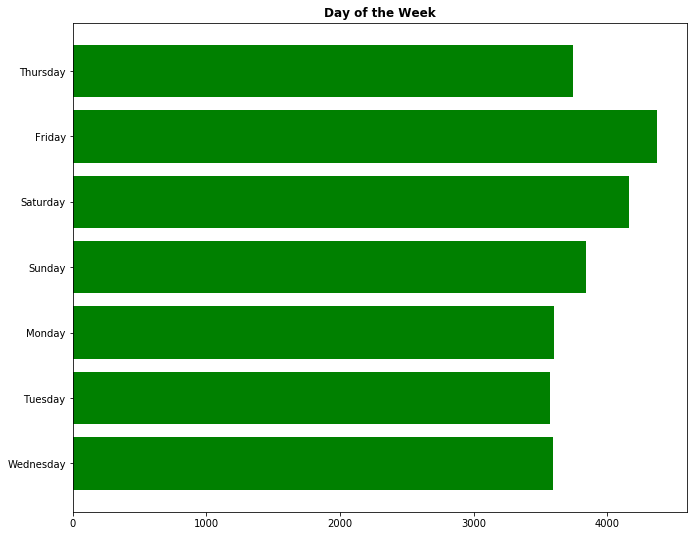

In [466]:
visualize_desc("STOLEN AUTOMOBILE")

7
PLACING WIFE IN HOUSE OF PROSTITUTION


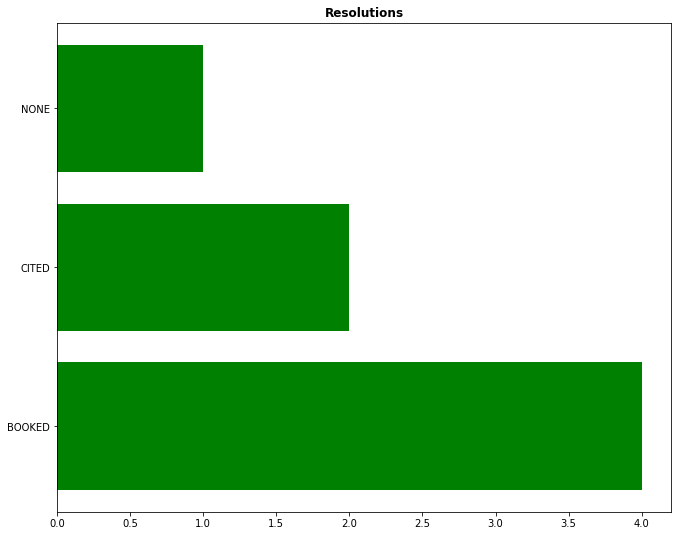

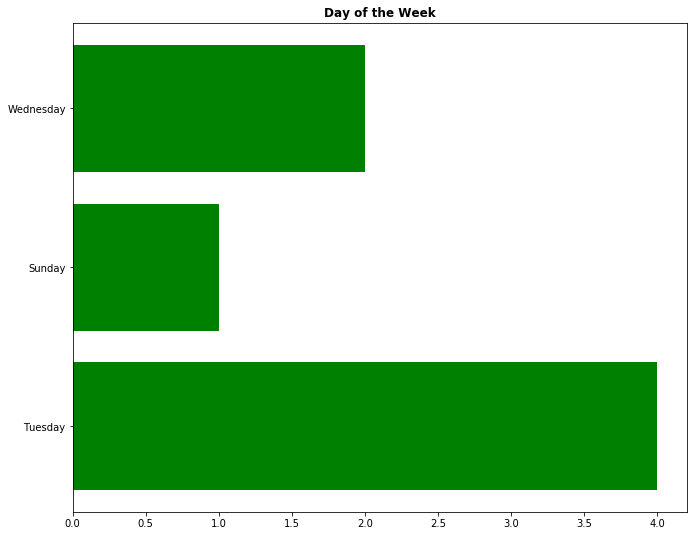

In [467]:
visualize_desc("PLACING WIFE IN HOUSE OF PROSTITUTION")

In [468]:
# df[df["Descript"] == "PLACING HUSBAND IN HOUSE OF PROSTITUTION"]
visualize_desc("PLACING HUSBAND IN HOUSE OF PROSTITUTION")

No incidents found for PLACING HUSBAND IN HOUSE OF PROSTITUTION


0

443
DANGER OF LEADING IMMORAL LIFE


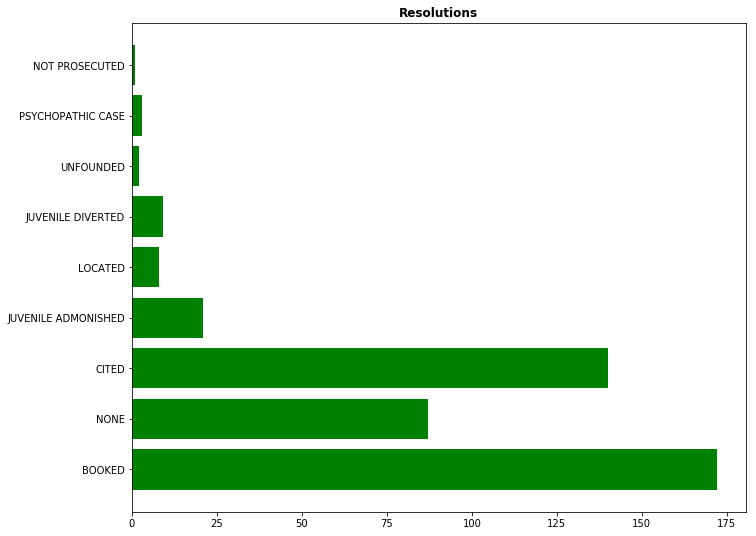

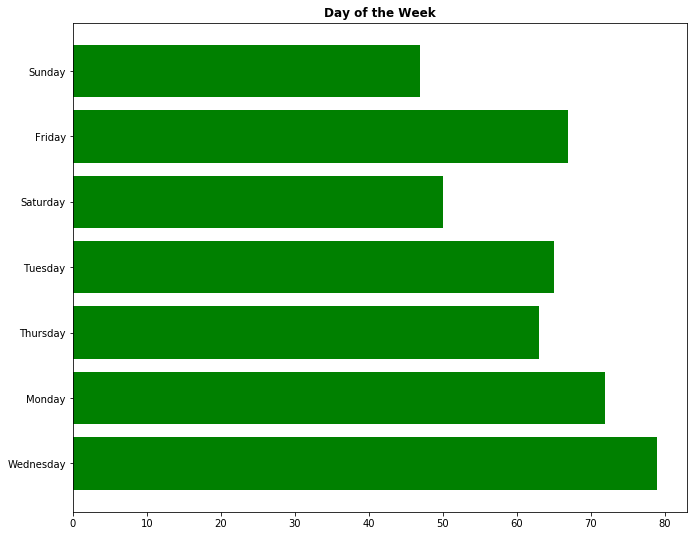

In [469]:
# df[df["Descript"] == "DANGER OF LEADING IMMORAL LIFE"]
visualize_desc("DANGER OF LEADING IMMORAL LIFE")



38
MAYHEM WITH A DEADLY WEAPON


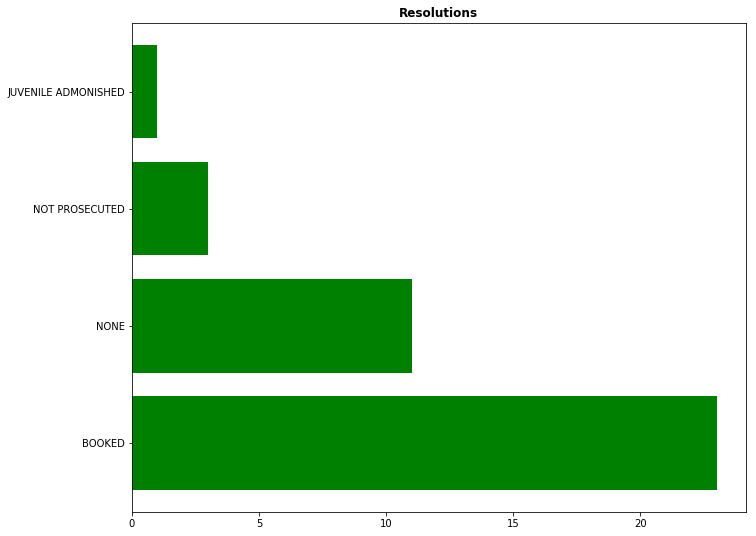

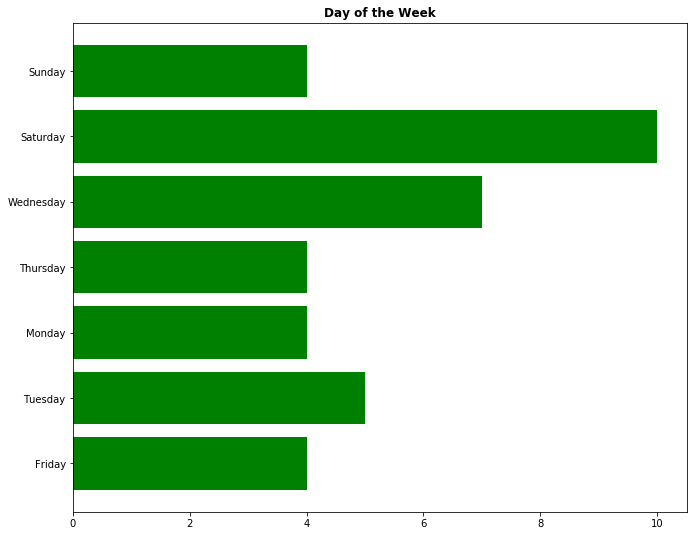

In [470]:
# df[df["Descript"] == "MAYHEM WITH A DEADLY WEAPON"]
visualize_desc("MAYHEM WITH A DEADLY WEAPON")


15
FORTUNE TELLING


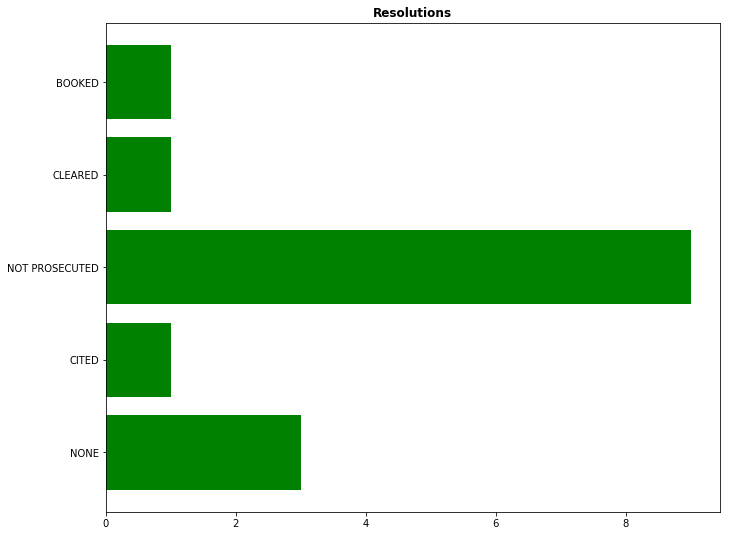

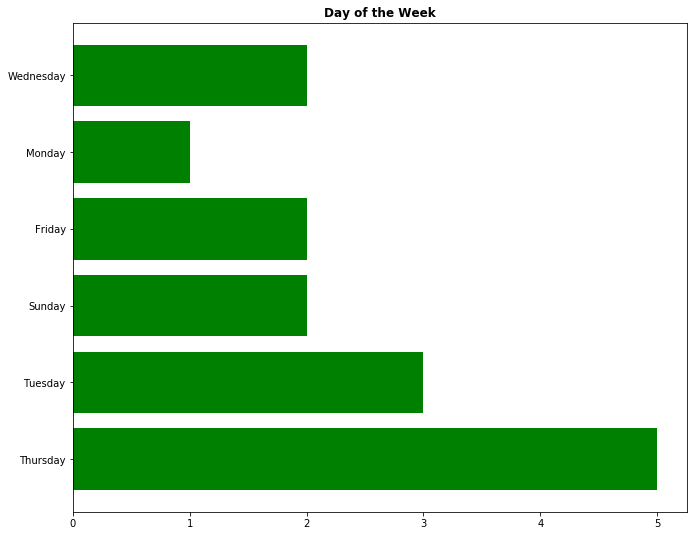

In [471]:

# display(df[df['Descript'] == 'FORTUNE TELLING'])
visualize_desc("FORTUNE TELLING")

#Here is a random Data Frame for your enjoyment
# goose = pd.DataFrame([["one", "two"], ["two", "Three"]], columns=["one", "Two"])
# display(goose)

# duck = pd.DataFrame([["duck", "tuck"], ["muck", "luck"]], columns=["ruckus", "muckus"])
# display(duck)

# birds = [goose, duck]

# fritters = pd.concat(birds)
# display(fritters)

2
ASSAULT, AGGRAVATED, W/ MACHINE GUN


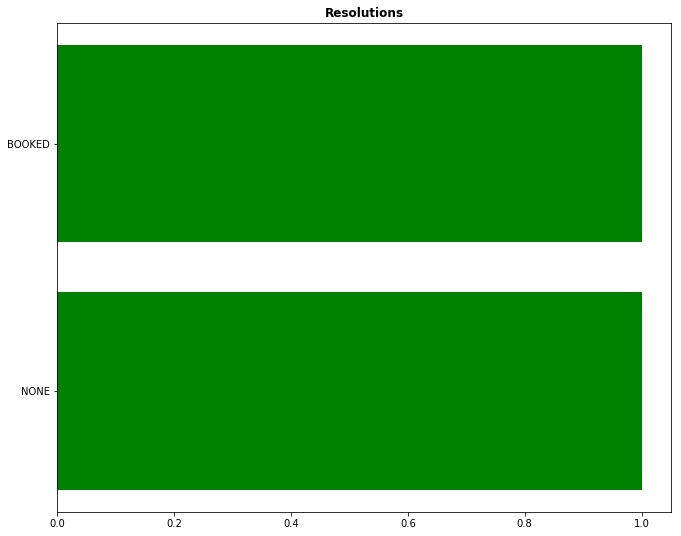

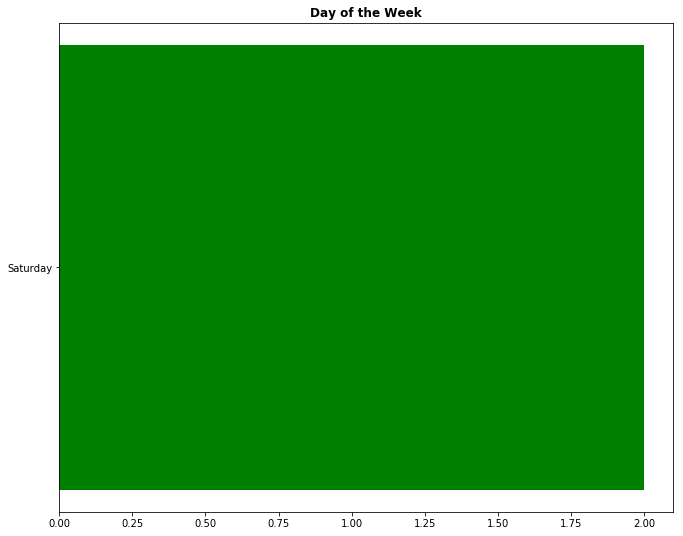

In [472]:
# df[df["Descript"] == "ASSAULT, AGGRAVATED, W/ MACHINE GUN"]
visualize_desc("ASSAULT, AGGRAVATED, W/ MACHINE GUN")

18
DESTRUCTION OF PROPERTY WITH EXPLOSIVES


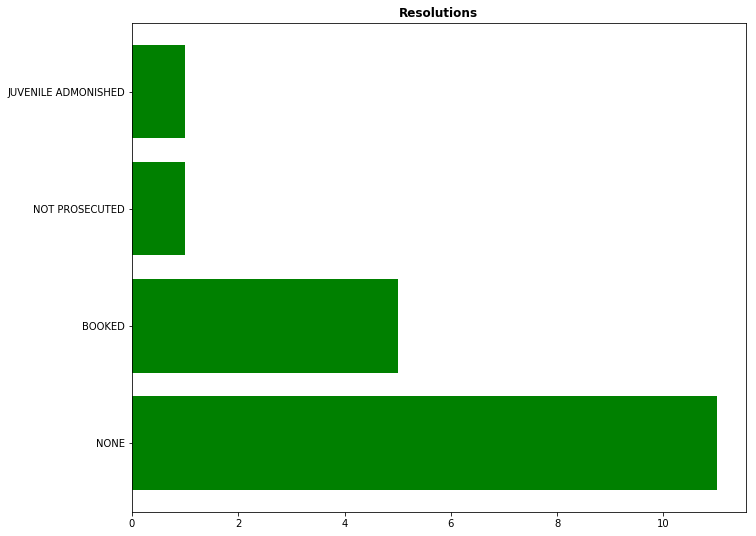

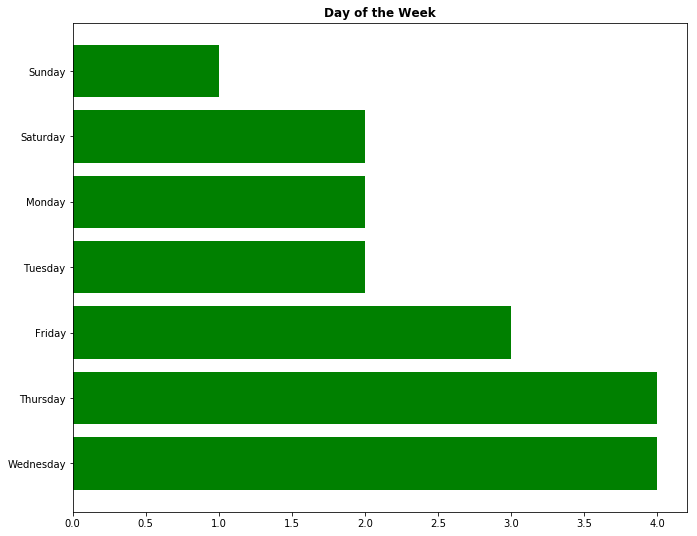

In [473]:

# display(df[df["Descript"] == "DESTRUCTION OF PROPERTY WITH EXPLOSIVES"])
visualize_desc("DESTRUCTION OF PROPERTY WITH EXPLOSIVES")


In [474]:
# df[df["Descript"] == "ASSAULT, AGGRAVATED, W/ MACHINE GUN"]

#ML Question: Given the location a crime was commited and the type of crime, predict the outcome

df['Resolution'].unique()

array(['BOOKED', 'NONE', 'CITED', 'PSYCHOPATHIC CASE', 'UNFOUNDED',
       'CLEARED', 'LOCATED', 'NOT PROSECUTED', 'JUVENILE DIVERTED',
       'JUVENILE ADMONISHED', 'PROSECUTED'], dtype=object)

In [475]:
# display(df[df['Category']=='TREA'])
# len(df[df['Category']=='TREA'])


In [476]:

len(df['Address'].unique())

23228

In [477]:
df.isnull().values.any()

False

In [478]:
print(len(df))
print(len(df["Address"].unique()))

878049
23228


[]

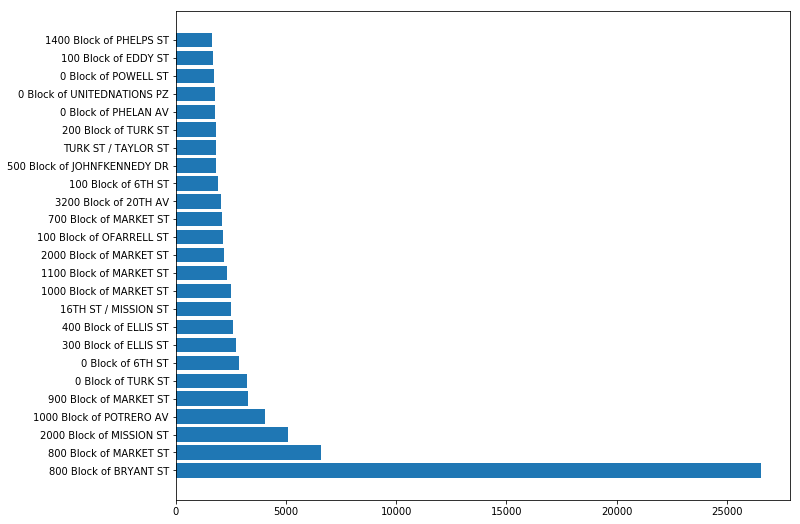

In [479]:
histdict = list(Counter(df['Address']).most_common(25))
address = []
density = []
# display(histdict)
for key in histdict:
    address.append(key[0])
    density.append(key[1])
# display(Counter(df['Address']).most_common(25))



fig, ax = plot.subplots(figsize=(11, 9))
# ax.figure(figsize = (20,12))
# ax.bar(density, address, color='r')

plot.barh(range(len(address)),density)
plot.yticks(range(len(address)), address)
plot.plot()

# Lets predict some stuff...

In [480]:
#Clean the data

#800 Bryant street is the police station... What's going on here? 
#Let's remove everythign with this address
df_list = df.index[df["Address"] == "800 Block of BRYANT ST"].tolist()
cleaned_df = df.drop(df.index[df_list])
cleaned_df[cleaned_df["Address"] == "800 Block of BRYANT ST"]

# What are the dates doing for us? 
# Answer: They're making our lives more complicated. Get them outta here.
# Imagine all the dummy variables we're going to have to make for those addresses.
# Do we need them if we have lattitude and longitude?
cleaned_df.drop(["Dates", "Address", "Descript"], axis = 1, inplace=True)
cleaned_df.head()

,Category,DayOfWeek,PdDistrict,Resolution,X,Y
0,WARRANTS,Wednesday,NORTHERN,BOOKED,-122.425892,37.774599
1,OTHER OFFENSES,Wednesday,NORTHERN,BOOKED,-122.425892,37.774599
2,OTHER OFFENSES,Wednesday,NORTHERN,BOOKED,-122.424363,37.800414
3,LARCENY/THEFT,Wednesday,NORTHERN,NONE,-122.426995,37.800873
4,LARCENY/THEFT,Wednesday,PARK,NONE,-122.438738,37.771541


In [481]:
# cleaned[cleaned["Address"] == "800 Block of BRYANT ST"]

,Category,DayOfWeek,PdDistrict,X,Y
0,WARRANTS,Wednesday,NORTHERN,-122.425892,37.774599
1,OTHER OFFENSES,Wednesday,NORTHERN,-122.425892,37.774599
2,OTHER OFFENSES,Wednesday,NORTHERN,-122.424363,37.800414
3,LARCENY/THEFT,Wednesday,NORTHERN,-122.426995,37.800873
4,LARCENY/THEFT,Wednesday,PARK,-122.438738,37.771541


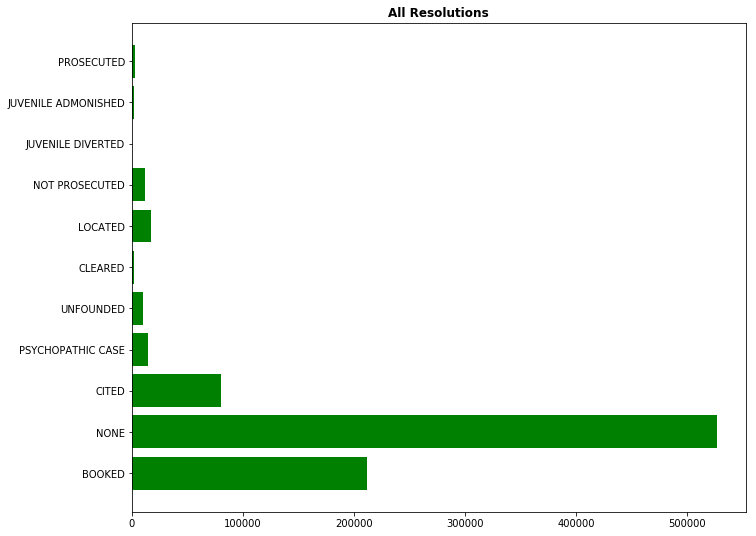

In [482]:
classfs = []
accuracy = []
time_ls = []

resolution_hist = Counter(df["Resolution"])
hist_vis(dict(resolution_hist), "All Resolutions")


cats = pd.Series(cleaned_df["Resolution"]).astype('category')
label_ints = cats.cat.codes
labels = cats

#Remove Labels from Dataset
cleaned_df.drop(["Resolution"], axis=1, inplace=True)
cleaned_df.head()

In [483]:
%%time
#This is how it's done Labels into numbers into labels according to stack overflow
# x = pd.Series(['a', 'a', 'a', 'b', 'b', 'c']).astype('category')
# display(x.cat.codes)
# display(x)
from sklearn.preprocessing import StandardScaler
cleaned_df = pd.get_dummies(cleaned_df, prefix='sf_')
# Create a StandardScaler() Object. 
scaler = StandardScaler()
# Call scaler.fit() on the data frame that will be rescaled.
scaler.fit(cleaned_df)

scaled_X_vals = scaler.transform(cleaned_df)

X_train, X_test, y_train, y_test = train_test_split(scaled_X_vals, label_ints, test_size=0.5)


CPU times: user 2.3 s, sys: 1.91 s, total: 4.21 s
Wall time: 4.67 s


In [484]:


start = time.time()


#Using Decision Trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

clf = DecisionTreeClassifier()
fitted = clf.fit(X_train, y_train)
test_pred = clf.predict(X_test)

end = time.time()
time_ls.append(end - start)

In [485]:
decision_accuracy = accuracy_score(y_test, test_pred)
classfs.append("DT")
accuracy.append(decision_accuracy)
print("accuracy score: {}".format(decision_accuracy))
print(time_ls)

accuracy score: 0.7059268410693399
[10.137115001678467]


In [486]:
#K nearest runtime is quadratic and a bit much for a small laptop working on 800k rows and >50 features
#Try this on a super computer and maybe it will finish within my lifetime

# from sklearn.neighbors import KNeighborsClassifier

# neigh = KNeighborsClassifier(n_neighbors=25)
# neigh.fit(X_train, y_train)
# pred = neigh.predict(X_test)
# accuracy = accuracy_score(y_test, pred, normalize=True, sample_weight = None)
# print("sklearn", accuracy)


In [487]:
# knn_accuracy = accuracy
# from sklearn.naive_bayes import GaussianNB
# # Create a GaussianNB() object and fit it using the training data
# clf = GaussianNB()
# clf.fit(X_train, y_train)
# # Use the fitted model to create predictions for the X_test data.
# preds = clf.predict(X_test)

In [488]:
from sklearn.naive_bayes import GaussianNB
start = time.time()
# Create a GaussianNB() object and fit it using the training data
clf = GaussianNB()
clf.fit(X_train, y_train)
# Use the fitted model to create predictions for the X_test data.
preds = clf.predict(X_test)
accy = accuracy_score(y_test, preds)
classfs.append("GNB")
accuracy.append(accy)
end = time.time()
time_ls.append(end - start)
print("accuracy score: {}".format(accy))
print(end-start)

accuracy score: 0.03249498541424941
5.003225803375244


In [489]:
def create_confusion_matrix(predictions, labels):
    
    confusion_matrix = {"TP": 0, "TN": 0, "FP": 0, "FN": 0}
    label_list = list(labels.values.flatten())

    label_index = 0
    
    for row in predictions:

        if row == label_list[label_index]:
            
            if row == 1:
                confusion_matrix["TP"] += 1
            else:
                confusion_matrix["TN"] += 1
        else:
            if row == 1:
                confusion_matrix["FP"] += 1
            else:
                confusion_matrix["FN"] += 1
        label_index += 1

    print(confusion_matrix)
    return confusion_matrix

In [490]:
from sklearn.ensemble import RandomForestClassifier 

def rfClassify(plot_title, trees, depth):
    start = time.time()
    clf = RandomForestClassifier(n_estimators=trees, max_depth=depth, min_samples_split=50)
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    accy = accuracy_score(y_test, preds)
    time_ls.append(end - start)
    print("accuracy score: {}".format(accy))
    
    return (plot_title, accy)

    


In [491]:
start = time.time()
clf = RandomForestClassifier(n_estimators=30, max_depth=4, min_samples_split=50)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
accy = accuracy_score(y_test, preds)

classfs.append("RF2")
accuracy.append(accy)
end = time.time()
time_ls.append(end - start)
print("accuracy score: {}".format(accy))

accuracy score: 0.6556635459580324


In [492]:
%%time
start = time.time()
clf = RandomForestClassifier(n_estimators=10, max_depth=4, min_samples_split=50)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
accy = accuracy_score(y_test, preds)

classfs.append("RF3")
accuracy.append(accy)
end = time.time()
time_ls.append(end - start)
print("accuracy score: {}".format(accy))

accuracy score: 0.6435815651144547
CPU times: user 2.91 s, sys: 231 ms, total: 3.14 s
Wall time: 3.17 s


In [493]:
start = time.time()
clf = RandomForestClassifier(n_estimators=30, max_depth=1, min_samples_split=50)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
accy = accuracy_score(y_test, preds)

classfs.append("RF4")
accuracy.append(accy)
end = time.time()
time_ls.append(end - start)
print("accuracy score: {}".format(accy))

accuracy score: 0.596897768215747


In [494]:
%%time
start = time.time()
clf = RandomForestClassifier(n_estimators=30, max_depth=2, min_samples_split=50)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
accy = accuracy_score(y_test, preds)

classfs.append("RF5")
accuracy.append(accy)
end = time.time()
time_ls.append(end - start)
print("accuracy score: {}".format(accy))

accuracy score: 0.596897768215747
CPU times: user 5.43 s, sys: 553 ms, total: 5.98 s
Wall time: 6.06 s


In [495]:
%%time
start = time.time()
clf = RandomForestClassifier(n_estimators=60, max_depth=16, min_samples_split=50)
clf.fit(X_train, y_train)
max_preds = clf.predict(X_test)
accy = accuracy_score(y_test, max_preds)

classfs.append("RF6")
accuracy.append(accy)
end = time.time()
time_ls.append(end - start)
print("accuracy score: {}".format(accy))

accuracy score: 0.7450875849661075
CPU times: user 46.1 s, sys: 1.26 s, total: 47.3 s
Wall time: 47.9 s


In [496]:
%%time
start = time.time()
clf = RandomForestClassifier(n_estimators=100, max_depth=16, min_samples_split=50)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
accy = accuracy_score(y_test, preds)

classfs.append("RF7")
accuracy.append(accy)
end = time.time()
time_ls.append(end - start)
print("accuracy score: {}".format(accy))

accuracy score: 0.7454986165850084
CPU times: user 1min 17s, sys: 2.17 s, total: 1min 19s
Wall time: 1min 21s


In [497]:
create_confusion_matrix(max_preds, y_test)

{'TP': 16991, 'TN': 300236, 'FP': 14770, 'FN': 93761}


{'FN': 93761, 'FP': 14770, 'TN': 300236, 'TP': 16991}

0.09090909090909091


[]

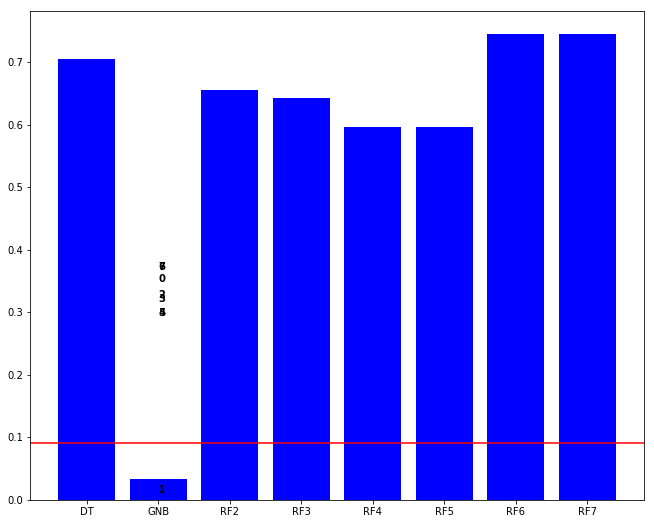

In [498]:
fig, ax = plot.subplots(figsize=(11, 9))
# ax.figure(figsize = (20,12))
rects = ax.bar(classfs, accuracy, color='b')
random_chance = 1/num_labels
print(random_chance)
plot.axhline(y=random_chance, color='r', linestyle='-')
bar_index = 0
rect_labels = []
# Lastly, write in the ranking inside each bar to aid in interpretation
for rect in rects:
    # Rectangle widths are already integer-valued but are floating
    # type, so it helps to remove the trailing decimal point and 0 by
    # converting width to int type
    width = int(rect.get_width())


    # The bars aren't wide enough to print the ranking inside
    if (width < 5):
        # Shift the text to the right side of the right edge
        xloc = width + 1
        # Black against white background
        clr = 'black'
        align = 'left'
    else:
        # Shift the text to the left side of the right edge
        xloc = 0.98*width
        # White on magenta
        clr = 'white'
        align = 'right'

    # Center the text vertically in the bar
    yloc = rect.get_y() + rect.get_height()/2.0
    label = ax.text(xloc, yloc, bar_index, horizontalalignment=align,
                     verticalalignment='center', color=clr, weight='bold',
                     clip_on=True)
    rect_labels.append(label)
    bar_index += 1

plot.plot()

# Summary

#### Naive Bayes is terrible for this dataset
#### Single decision tree gives good results
#### Bestest result from random forest
Best random forest results are when there are 60 trees at a max depth of 16 branches